In [11]:
# Импортируем наши библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('../mlprojects/data/bestsellers with categories.csv')

In [83]:
# Смотрим на наши данные
data.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [14]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [69]:
#  Можно сказать, что в среднем книги по 13$ и их средняя оценка равна 4,6
data.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

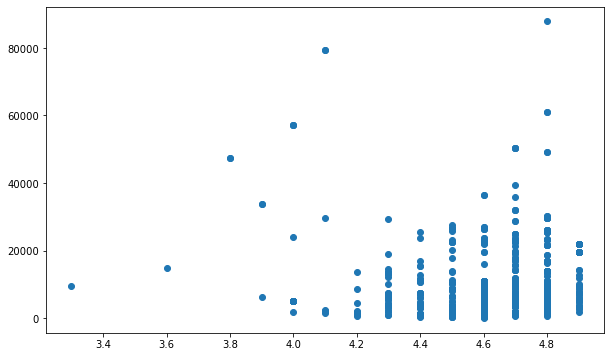

In [76]:
# У нас нет ни одного пропущенного значения, отлично, идем дальше
fig, ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(x = data['User Rating'],
                    y = data['Reviews'])


Первое, что бросается в глаза, рейтинг связан с покупками, буду считать, что reviews - это кол-во покупок, но иногда книги с рейтингом ниже 4.5 привлекает много внимания и это их погубило. То есть книга могла иметь рейтинг выше 4.5 с обретением популярности и в силу специфичности содержания книги, книга потеряла свой рейтинг, но все равно остается в топе

In [84]:
len(data.Author.unique())

248

Можно также видеть, что у одного и того же автора несколько его книг попали в топ. Грубо можно предположить, что здесь 250 авторов и каждый написал по 2 книги

In [117]:
non_fiction_top = data.loc[(data['User Rating'] > 4.7) & (data['Genre']=='Non Fiction')]

In [118]:
fiction_top = data.loc[(data['User Rating'] > 4.7) & (data['Genre']=='Fiction')]

In [119]:
percantage = round(len(fiction_top)/len(non_fiction_top), 2)
percantage

1.89

Можно сделать вывод, что худ.литература продается почти в 2 раза больше. Посмотрим другой сегмент, скажем от 4.5 и до 4.7 - это будет средний сегмент и что ниже, соответственно низкий сегмент.


In [112]:
non_fiction_med = data.loc[(data['User Rating'] > 4.5) & (data['Genre']=='Non Fiction') & (data['User Rating'] < 4.7)]

In [113]:
fiction_med = data.loc[(data['User Rating'] > 4.5) & (data['Genre']=='Fiction') & (data['User Rating'] < 4.7)]

In [115]:
percantage = round(len(fiction_med)/len(non_fiction_med),2)
percantage

0.42

Средний сегмент у нас забирает Non Fiction лит-ра. Здесь уже кол-во книг Non Fiction больше Fiction больше, чем в 2 раза.

In [127]:
mean = data.Reviews.mean()

In [130]:
non_fict_author = data.Author[(data['User Rating'] > 4.7) & (data['Genre']=='Non Fiction') & (data['Reviews'] > 2 * mean)].unique().tolist()
non_fict_author

['Michelle Obama', 'Gary Chapman', 'Laura Hillenbrand']

Можно также увидеть, что авторов Non Fiction, которые продали свои книги больше, чем в 2 раза, нежели остальная лит-ра,всего 3. Под остальной лит-рой я подразумеваю все книги и Non Fiction, и Fiction.

In [132]:
fict_author = data.Author[(data['User Rating'] > 4.7) & (data['Genre']=='Fiction') & (data['Reviews'] > 2 * mean)].unique().tolist()
fict_author

['Kristin Hannah', 'Craig Smith', 'Harper Lee', 'Delia Owens']

А авторов в жанре Fiction целых 4, все идет к тому, что успех больше у тех, кто пишет в жанре Fiction. Повторюсь, это всей выборке.

In [149]:
name_non_fiction = data.Name[(data['User Rating'] > 4.7) & (data['Genre']=='Non Fiction') & (data['Reviews'] > 2 * mean)].unique().tolist()
name_fiction = data.Name[(data['User Rating'] > 4.7) & (data['Genre']=='Fiction') & (data['Reviews'] > 2 * mean)].unique().tolist()

In [150]:
most_popuplar_non_fic = list(zip(non_fict_author, name_non_fiction))
most_popular_fic = list(zip(fict_author, name_fiction))

Теперь у нас есть список популярных книг для Fiction и для Non Fiction, также их авторы.